### Свёрточные нейронные сети a.k.a Convolutional neural nets

Распознавание и обработка изображений это довольно специфическая задача. Пусть это и небольшая часть возможностей нейронных сетей, но сами нейронные сети, получили развитие именно благодаря задаче обработки изображений. Алгоримы в этой задаче сейчас развиты больш всего и часто, даже алгоритмы работы с текстом или структурированными данными берут своё начало в работе с изображениями. По этому нам важно иметь общее представление, о том, как они работают и устроенны.

Задачи работы с изображениями могут разниться. Например, мы может классифицировать изображение (18+ или обычное), можем определить где находится объект (где на дороге находятся другие автомобили), определить точный полигон объекта, преобразовать изображение каким либо образом и т.д.

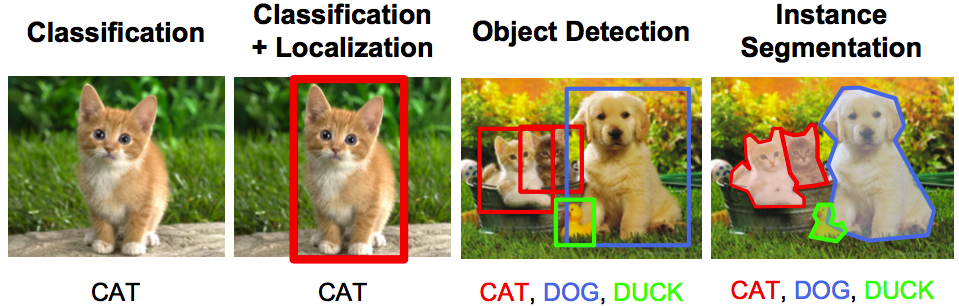

In [5]:
from IPython.display import Image
Image(filename='img/l6_1.png')

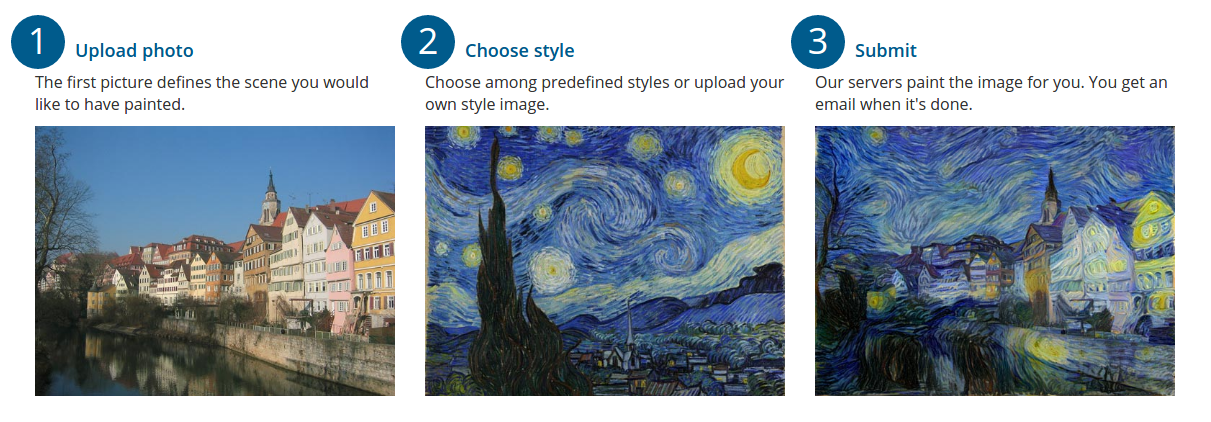

In [213]:
Image(filename='img/l6_2.png')

Но ведь мы уже умеем работать с изображениями. Мы стоили нейронную сеть для классификации изображений, зачем же нам новый алгоритм свёрточных нейронных сетей?

Ранее мы работали с изображениями 28х28 пикселей, что равняется 784 пикселям и соответсвенно весам. Если мы возьмёмся за классификацию изображений 1000х1000 пикселей то получим 1 000 000 весов уже на входном слое, при построении одного скрытого слоя такой же мощности, общее количество весом составит 1 млрд. Нейронная сеть с таким количеством параметров легко сможет запомнить огромные датасеты изображений и по факту ничего не обучиться. К тому же такое количество весом невозможно обучить на современном оборудовании. Для работы с изображениями был нужен новых подход.

Ранее мы говорили, что нейронные сети, на разных уровнях учатся различать различные шаблоны. На начальных уровнях это совсем простые шаблоны: горизонтальные линии, вертикальные линии, участки цвета и т д. На следующих уровнях это могут быть формы круга, прямоугольника, многогранника. На поздних слоях это может быть лицо, колесо, дом.

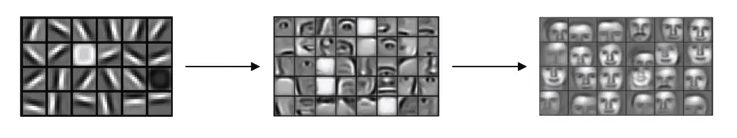

In [214]:
Image(filename='img/l6_3.png')

Но что означает "шаблон горизонтальной линии" и как это работает?

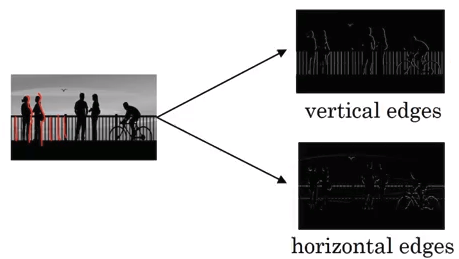

In [215]:
Image(filename='img/l6_4.png')

Применяя фильтр вертикальных линий мы получим вариант изображения сверху, горизонтальных снизу. Это то, как наша нейронная сеть будет видеть исходное изображение, применяя к нему разные фильтры.

Рассмотрим пример, как наша нейронная сеть может различить вертикальные линии. 

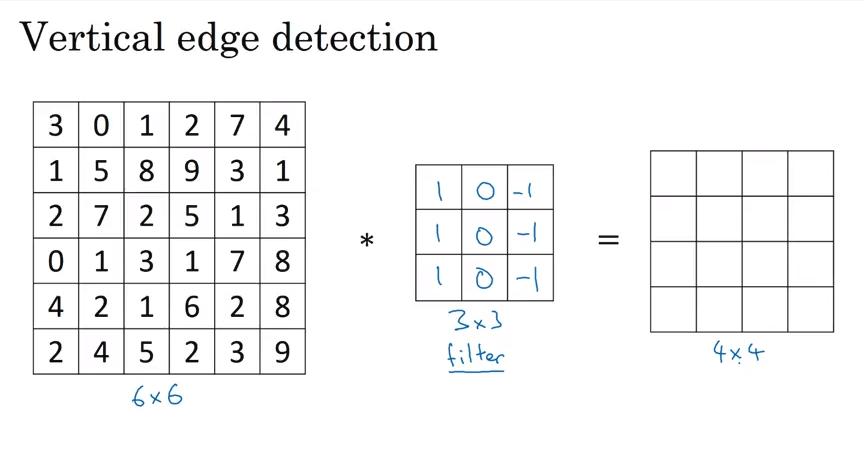

In [216]:
Image(filename='img/l6_5.png')

Изначально на входе у нас есть изображение (матрица), и мы можем применить к этому изображению фильтр, чтобы определить вертикальные линии. Фильтр специально имеет такую форму, левая часть фильтра положительна, правая отрицательная. Так мы видим где на изображении будет вертикальный переход.

Операция между матрицей и фильтром называется "свертка" (обозначается "*"). 

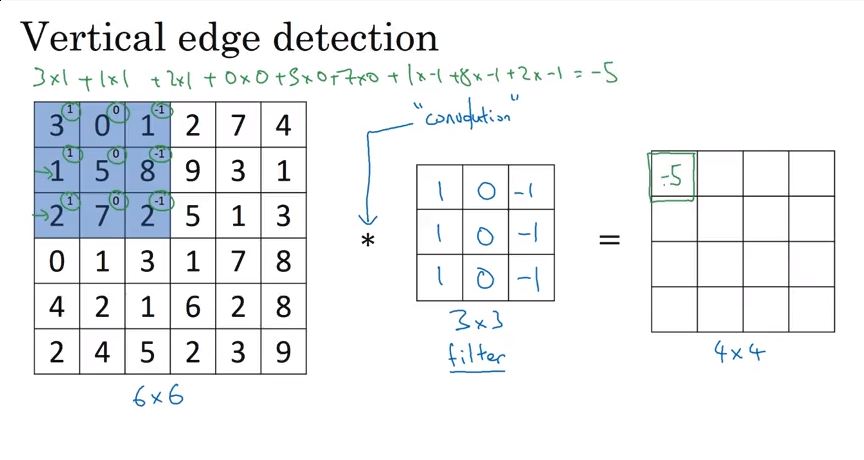

In [217]:
Image(filename='img/l6_6.png')

Для свёртки нам надо наложить фильтр на нашу матрицу и произвести поэлементное умножение, затем сложить результат. Так мы получим одно значение результирующей матрицы. Далее сдвигаем фильтр на 1 вправо и снова производим свёртку.

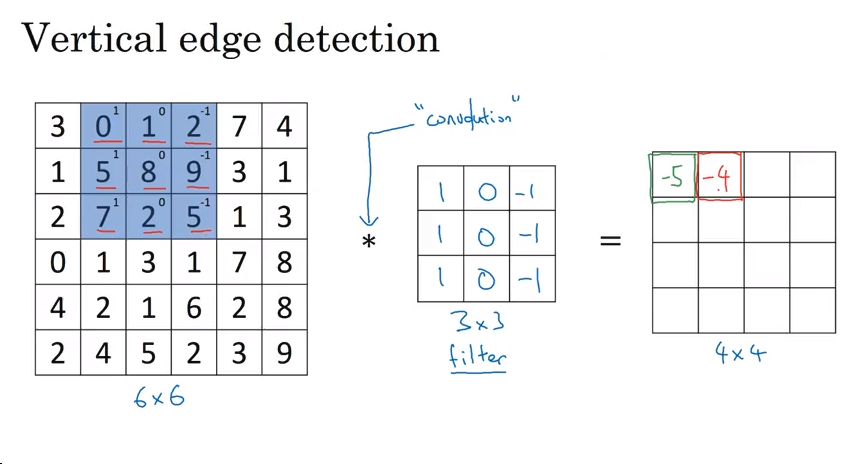

In [218]:
Image(filename='img/l6_7.png')

и так далее пока не получим всю матрицу

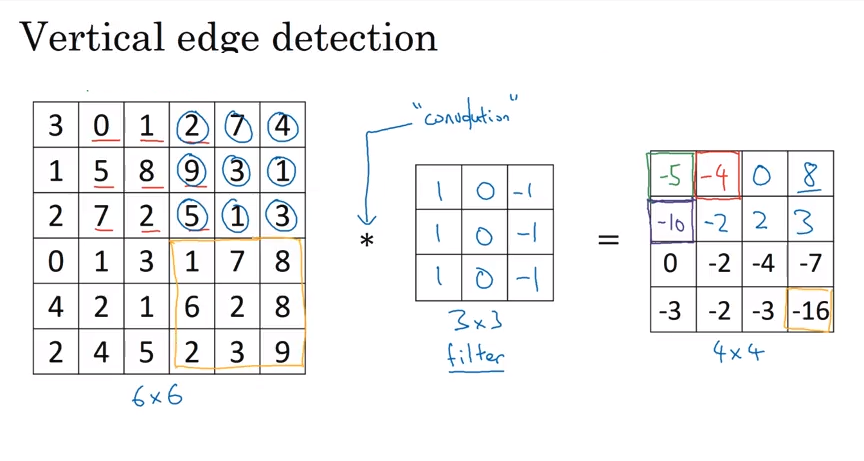

In [219]:
Image(filename='img/l6_8.png')

Почему же этот фильт выделяет вертикальную грань?

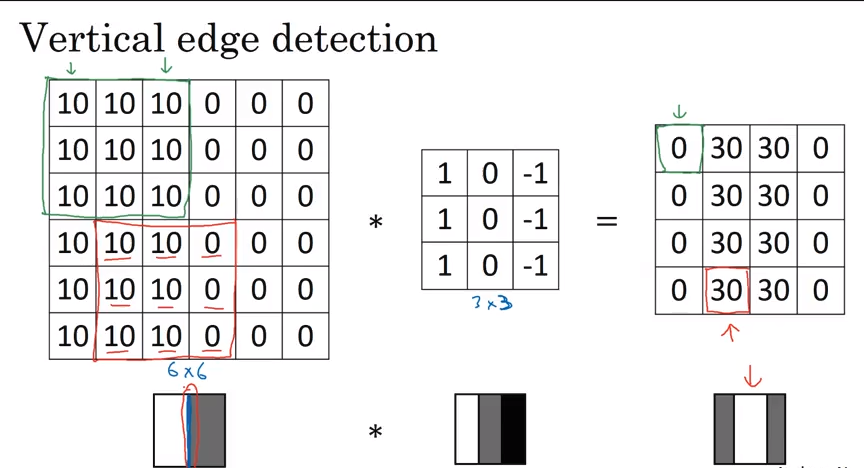

In [220]:
Image(filename='img/l6_9.png')

Могут быть фильтры определяющие другие линии

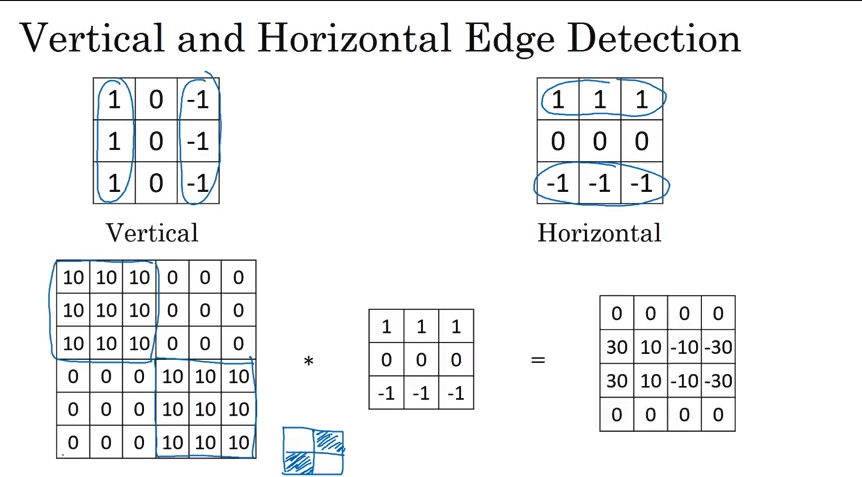

In [221]:
Image(filename='img/l6_10.png')

Теперь нашей задачей и будет поиск этих фильтров, с помощию которых мы сможем определить содержание изображения наилучшим образом

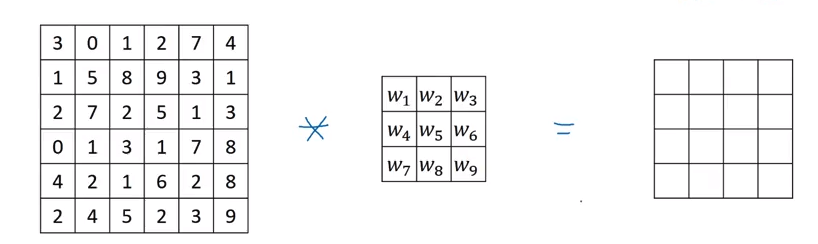

In [222]:
Image(filename='img/l6_11.png')

Анимированный пример https://cs231n.github.io/assets/conv-demo/index.html

С общим принципом свёртки мы разобрались. Посмотрим как теперь применить это не только к матрице, которая могла бы представлять собой ч\б изображение, но как работать с RGB изображениями, у которых есть каналы цветов. Теперь наше изображение будет не просто 100х100 пикселей, но 100х100х3, где последнее число представляет количество каналов (красный-зелёный-синий).

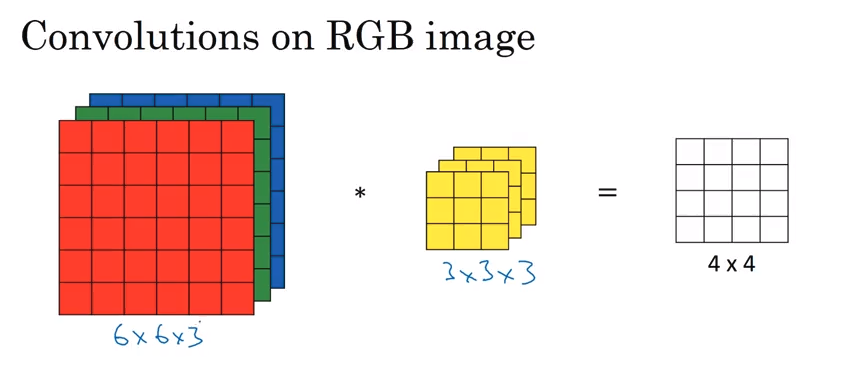

In [223]:
Image(filename='img/l6_12.png')

Теперь и наш фильт имеет 3 канала "глубины". Это общепринятая практика, чтобы количество каналов в исходном изображении совпадало с количеством каналов в фильтре. Теперь в нашем фильтре не 9 параметров, а 27. А процесс свёртки работает точно так же как и с матрицей. Мы проходим фильтром по всему объёму, делаем поэлементное умножение и суммируем суммы произведений.

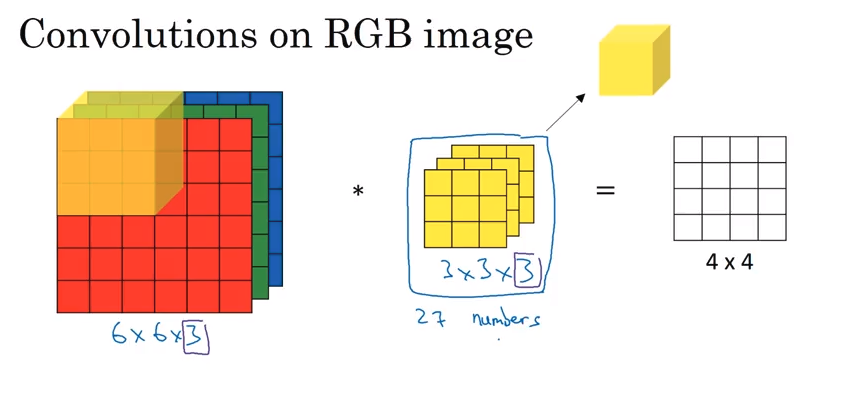

In [224]:
Image(filename='img/l6_13.png')

Стоит обратить отдельное внимание, что результирующая матрица не будет иметь глубины, в нашем случае 4х4х1.

Теперь мы так же можем искать вертикальные элементы, как в одном канале, так и во всём изображении. Но в реальных задачах мы захотим использовать не один фильтр, а много. В этом случае мы сконструируем столько фильтров сколько нам необходимо.

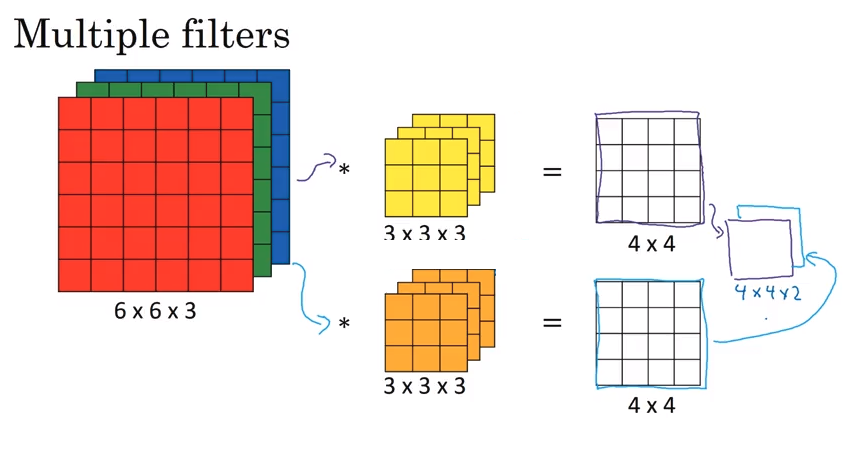

In [225]:
Image(filename='img/l6_14.png')

После применения каждого фильтра мы получим матрицу 4х4х1, и мы можем их составить в одно объёмное представление. Тогда если у нас будет N фильтров исходного изображения, на выходе нашего примера мы получим фигуру размерностью 4х4хN (тензор).

Теперь посмотрим как это будет работать в нейронной сети.

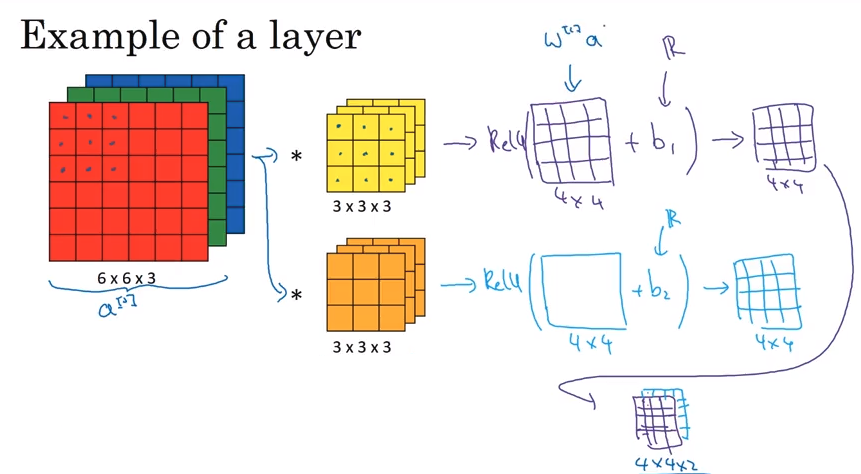

In [226]:
Image(filename='img/l6_15.png')

В нашем случае входное изображение будет представлять собой набор значений X (чисел). Каждый фильтр имеет набор параметров W. Теперь так же как и в обычной сети мы просто умножаем (сворачиваем) X*W, добавляем параметр b и используем функцию активации для нелинейности. Проделываем эту последовательность для каждого фильтра и на выходе у нас получится тензор размерностью 4х4хN (в соответсвии с примером, в реальной жизни размерность будет произвольной AxBxN)

Посчитаем теперь количество параметров в нашей схеме. Один фильтр у нас имеет размерность 3х3х3 = 27 параметров + 1 параметр bias (b). Всего в одном фильтре 28 параметров. Если мы возьмём 10 различных фильтров, то еоличество параметров будет равно 280. Для любого входного изображения, будь оно 28х28х3 или 1000х1000х3 у нас будет всего 280 фильтров для обучения.

Разберёмся ещё с одним аспектом. Наше исходное изображение 6х6х3, но после применения фильтра, у нас получается размерность 4х4хN. Ширина и высота уменьшается и это не всегда удобно. У нас есть возожность сделать zero padding, т.е. просто добавить нулей по краям изображения. 

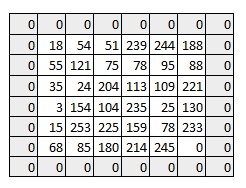

In [227]:
Image(filename='img/l6_16.png')

Теперь при свёртке у нас будет получаться тензор размерностью 6х6хN. 

Так же мы можем изменить шаг с которым мы применяем фильтр. Сдвигать его не на 1 шаг, а на любое количество .


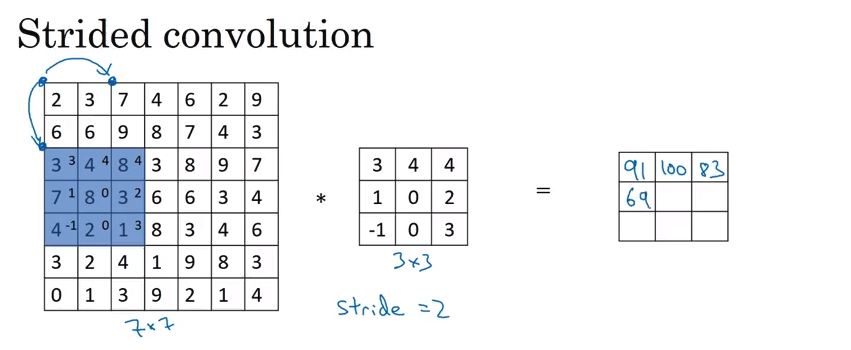

In [228]:
Image(filename='img/l6_17.png')

Теперь мы можем получить формулу размера результирующего тензора в зависимости от исходного изображения (<b>W</b>), размера фильтра(<b>F</b>), шага (stride, <b>S</b>), padding (<b>P</b>) 

$\frac{(W - F + 2P)}{S} + 1$

Теперь попробуем выстроить архитектуру простой свёрточной нейронной сети.

У нас есть изображение 39х39х3

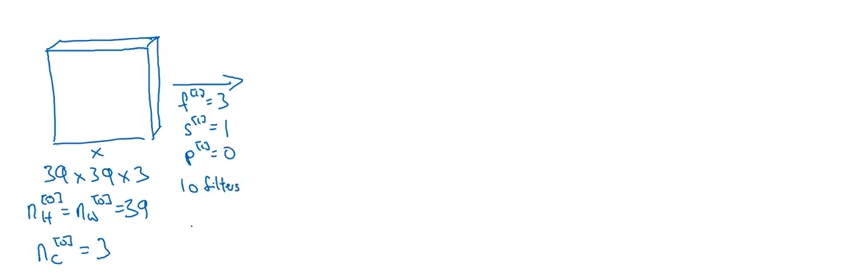

In [229]:
Image(filename='img/l6_18.png')

На первом шаге применим фильтр (f) размерностью 3х3, шаг (s) = 1, отсутствие padding (p) и 10 фильтров.

Тогда после свёртки мы получим тензор размером 37х37х10. По формуле $\frac{(W - F + 2P)}{S} + 1$ получаем $\frac{(39 - 3 + 2*0)}{1} + 1$

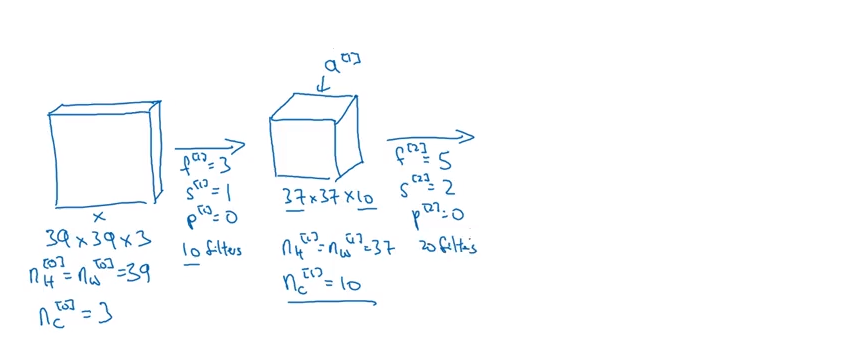

In [230]:
Image(filename='img/l6_19.png')

Теперь применим фильтр размерностью 5х5, при шаге 2, отсутствие padding и 20 фильтров.

Получим тензор размером 17х17х20.

Наконец применим фильтр 5х5, шаг 2, и 40 фильтров.

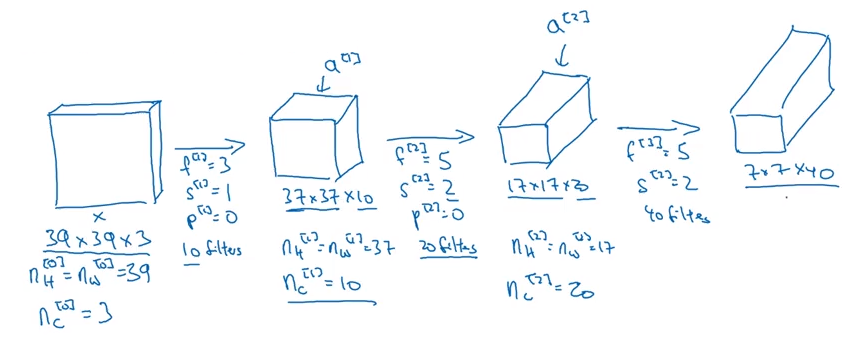

In [231]:
Image(filename='img/l6_20.png')

После того как мы уменьшили размерность нашего входного изображения, популярное решение использовать обычный fully-connected слой. Т.е. тот самый, который мы видели в предыдущем уроке. Мы превращаем наш тензор 7х7х40 в вектор 1960х1 и строим нейронную сеть.

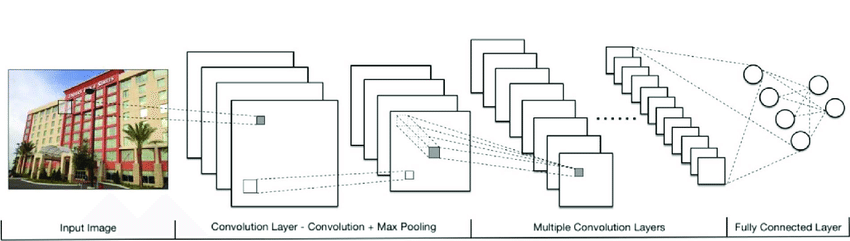

In [232]:
Image(filename='img/l6_21.png')

Теперь у нас полное представление о том, как создать свёрточную нейронную сеть. Но есть ещё один вид преобразования о котором стоит упомянуть.

Pooling. Используется для того, чтобы уменьшить размерность наших тензоров, чтобы уменьшить количество параметров. Работает следующий образом

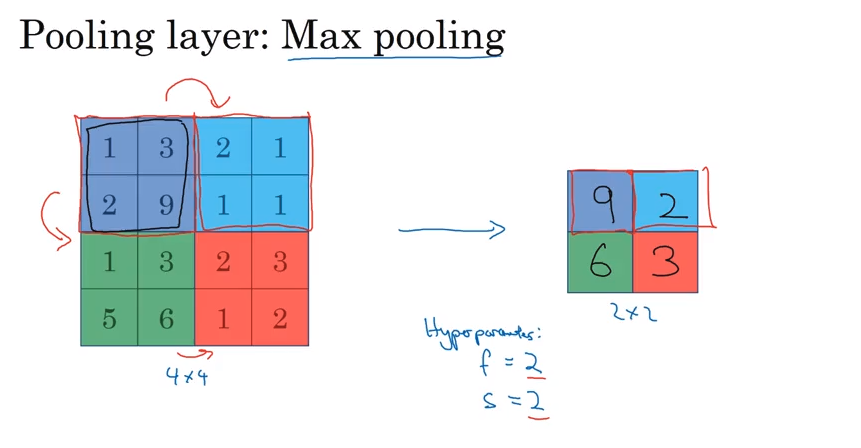

In [233]:
Image(filename='img/l6_22.png')

Т.е. Max pooling просто берёт максимальное число, а все остальные отбрасывает. Для pooling слоя нет параметров для обучения, но есть параметры шага и размера. Стоит заметить что pooling 2x2 s=2 уменьшает количество информации на 75%

Теперь у нас есть всё, чтобы приступить к практике.

In [47]:
import tensorflow as tf
import keras
from keras.models import Sequential
import keras.layers as ll

from keras.callbacks import TensorBoard
from time import time
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [48]:
cifar = tf.keras.datasets.cifar10

In [49]:
# Разбиваем данные на обучающий и тест сеты
(x_train, y_train),(x_test, y_test) = cifar.load_data()

In [50]:
# Нормализуем данные, теперь наши входные данные из диапазона [0,255] перейдут в диапазон [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0
# Меняет ответ из вида "4" в векторный вид [0,0,0,0,1,0,0,0,0]
y_train,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_test])

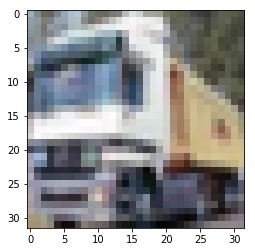

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[1])

In [52]:
x_train.shape

(50000, 32, 32, 3)

In [53]:
# Объявляем какого вида наша нейронная сеть
model = Sequential(name="mlp")
# На входе у нас изображения 32x32x3 пикселей
model.add(ll.InputLayer([32, 32, 3]))
model.add(ll.Conv2D(filters=10, kernel_size=(3,3),  activation='relu'))
model.add(ll.Conv2D(filters=20, kernel_size=(3,3),  activation='relu'))
model.add(ll.MaxPool2D(strides=2))
model.add(ll.Conv2D(filters=30, kernel_size=(3,3), activation='relu'))
model.add(ll.Conv2D(filters=40, kernel_size=(3,3), activation='relu'))
model.add(ll.MaxPool2D(strides=2))

# Распремляем матрицу, теперь у нас 5x5x32 вектор
model.add(ll.Flatten())
# Объявляем первый скрытый слой, там у нас будет 50 нейронов
model.add(ll.Dense(250))
# После скрытого слоя нам нужна нелинейность - функция активации
model.add(ll.Activation('relu')) # OR keras.layers.LeakyReLU()
# Второй скрытый слой
model.add(ll.Dense(250))
model.add(ll.Activation('relu'))
# Выходной слой, у нас 10 возможный классов, значит и 10 нейронов на выходе
model.add(ll.Dense(10, activation='softmax'))
# Оптимизируем модель при помощи SGD (стохастического градиентного спуска),
# Функция ошибки кросс-энтропия
# Метрика успешности модели - accuracy (количество угаданных / общее количество)
model.compile("adamax", "categorical_crossentropy", metrics=["accuracy"])

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 30, 30, 10)        280       
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 28, 28, 20)        1820      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 12, 12, 30)        5430      
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 10, 10, 40)        10840     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 40)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000)              0         
__________

In [55]:
# Обучение может занять несколько часов!
model.fit(x_train, y_train,
          validation_data=(x_test, y_test), epochs=5, callbacks=[tensorboard]);

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 58s 1ms/step - loss: 1.5579 - acc: 0.4279 - val_loss: 1.2990 - val_acc: 0.5319
Epoch 2/5
50000/50000 [==============================] - 57s 1ms/step - loss: 1.1832 - acc: 0.5783 - val_loss: 1.1438 - val_acc: 0.5898
Epoch 3/5
50000/50000 [==============================] - 57s 1ms/step - loss: 0.9982 - acc: 0.6462 - val_loss: 1.0031 - val_acc: 0.6489
Epoch 4/5
50000/50000 [==============================] - 57s 1ms/step - loss: 0.8663 - acc: 0.6957 - val_loss: 0.9148 - val_acc: 0.6820
Epoch 5/5
50000/50000 [==============================] - 57s 1ms/step - loss: 0.7674 - acc: 0.7288 - val_loss: 0.8823 - val_acc: 0.6912


Мы обучили свою первую свёрточную сеть, очень простой конфигурации. Но на самом деле архитектура свёрточной нейронной сети может быть сверх-сложной и выстраивание всех слоёв с настройкой размеров и шагов это очень-очень сложная задача. Хорошая новость в том, что нам редко это может понадобиться. Ведь до нас уже построили много работающий архитектур. Вместо того, чтобы изобреть велосипед, лучше возьмём одну и сетей победивших на соревновании ImageNet. Где надо классифицировать 12 млн изображений на 1000 классов. 

В разные года побеждали разные архитектуры, возьмём не очень сложную.

И сменим наш датасет, изображения 32х32 пикселя всё же очень маленькие и всех прелестей свёрточных нейронных сетей на них можно не увидеть. Перейдём к настоящим размерам изображений. Сейчас возьмём тестовой датасет (http://www.robots.ox.ac.uk/~vgg/data/pets/), который содержит фотографии домашних животных, 37 категории. В каждом классе около 200 изображений.

Сохраняем данные в папку data/

Фотографии (783 MB):<br>
http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz<br>
Категории (37 MB):<br>
http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

Обученные свёрточные сети имеют свою архитектуру, значит и имеют требования к входным изображениям.

#### Получения готовой модели

In [10]:
fine_model = keras.applications.VGG16()

In [11]:
fine_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

VGG архитектура на вход принимает изображения 224х224х3. Значит мы должны преобразовать наши изображения к нужному формату.

#### Подготовка изображений

In [56]:
# Мы будем обрезать и ресайзить изображения к IMG_SIZE x IMG_SIZE
IMG_SIZE = 224

In [57]:
def decode_image_from_raw_bytes(raw_bytes):
    img = cv2.imdecode(np.asarray(bytearray(raw_bytes), dtype=np.uint8), 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

Обрезать изображения будем выделяя квадрат в центре.

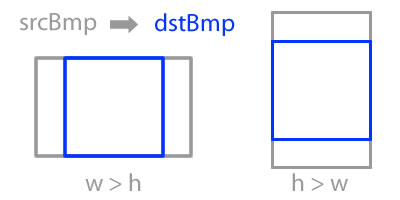

In [6]:
Image(filename='img/l6_24.jpg')

In [ ]:
def image_center_crop(img):
    """
    Makes a square center crop of an img, which is a [h, w, 3] numpy array.
    Returns [min(h, w), min(h, w), 3] output with same width and height.
    For cropping use numpy slicing.
    """
    smallest_side = min(img.shape[:2])
    center_point = (round(img.shape[0] /2), round(img.shape[1] / 2))
    upper_right_corner = (round(center_point[0] - (smallest_side / 2)), round(center_point[1] - (smallest_side / 2)))
    cropped_img = img[upper_right_corner[0]:upper_right_corner[0]+smallest_side,
                      upper_right_corner[1]:upper_right_corner[1]+smallest_side]
    
    return cropped_img

Восстанавливаем изображения из формата байтов

In [84]:
def prepare_raw_bytes_for_model(raw_bytes, normalize_for_model=True, inception=False):
    img = decode_image_from_raw_bytes(raw_bytes)  # decode image raw bytes to matrix
    img = image_center_crop(img)  # take squared center crop
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # resize for our model
    if normalize_for_model:
        img = img.astype("float32")  # prepare for normalization
        if inception:
            img = keras.applications.inception_v3.preprocess_input(img)
        else:
            img = keras.applications.vgg16.preprocess_input(img)
    return img

In [60]:
# reads bytes directly from tar by filename (slow, but ok for testing, takes ~6 sec)
def read_raw_from_tar(tar_fn, fn):
    with tarfile.open(tar_fn) as f:
        m = f.getmember(fn)
        return f.extractfile(m).read()

Нам нужен opencv устанавливаем -  conda install -c conda-forge opencv. Запускать shell надо от имени администратора

In [61]:
import os
import tarfile
import cv2
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split

Проверяем как наши изображения обрезаются

(375, 500, 3)


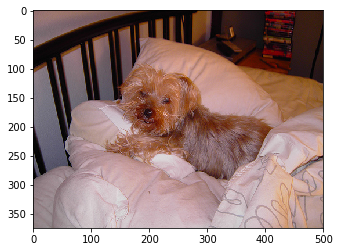

(224, 224, 3)


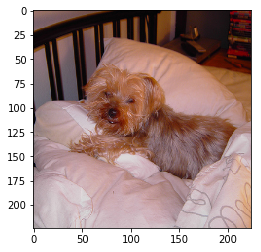

In [62]:
# test cropping
import os
image_path = os.path.join('data', 'images.tar.gz')
raw_bytes = read_raw_from_tar(image_path, r'images/yorkshire_terrier_200.jpg')

img = decode_image_from_raw_bytes(raw_bytes)
print(img.shape)
plt.imshow(img)
plt.show()

img = prepare_raw_bytes_for_model(raw_bytes, normalize_for_model=False)
print(img.shape)
plt.imshow(img)
plt.show()

#### Подготовка к обучению

Читаем классы из файла

In [63]:
label_path = os.path.join('data', 'annotations.tar.gz')
raw_labels = read_raw_from_tar(label_path, 'annotations/list.txt')
list_labels = raw_labels.decode("utf-8").split('\n')[6:-1]

all_files = ['images/' + s.split()[0] + '.jpg' for s in list_labels]
all_labels =  [int(s.split()[1]) -1 for s in list_labels] # read class labels (0, 1, 2, ...)
# all_files and all_labels are aligned now
N_CLASSES = len(np.unique(all_labels))
print(N_CLASSES)

37


In [64]:
# split into train/test
tr_files, te_files, tr_labels, te_labels = \
    train_test_split(all_files, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

Создаём генератор изображение - ответ

In [65]:
# will yield raw image bytes from tar with corresponding label
def raw_generator_with_label_from_tar(tar_fn, files, labels):
    label_by_fn = dict(zip(files, labels))
    with tarfile.open(tar_fn) as f:
        while True:
            m = f.next()
            if m is None:
                break
            if m.name in label_by_fn:                
                yield f.extractfile(m).read(), label_by_fn[m.name]

In [66]:
# batch generator
BATCH_SIZE = 32

def batch_generator(items, batch_size):    
    batch = list()
    for item in items:
        if len(batch) < batch_size:
            batch.append(item)
        else:
            yield batch
            batch = list()
    if batch:
        yield batch

Генератор для обучения сети

In [83]:
def train_generator(files, labels, inception=False):
    while True:  # so that Keras can loop through this as long as it wants
        for batch in batch_generator(raw_generator_with_label_from_tar(
                image_path, files, labels), BATCH_SIZE):
            # prepare batch images
            batch_imgs = []
            batch_targets = []
            for raw, label in batch:
                img = prepare_raw_bytes_for_model(raw, inception=inception)
                batch_imgs.append(img)
                batch_targets.append(label)
            # stack images into 4D tensor [batch_size, img_size, img_size, 3]
            batch_imgs = np.stack(batch_imgs, axis=0)
            # convert targets into 2D tensor [batch_size, num_classes]
            batch_targets = keras.utils.np_utils.to_categorical(batch_targets, N_CLASSES)
            yield batch_imgs, batch_targets

Проверяем что всё работает

(32, 224, 224, 3) (32, 37)


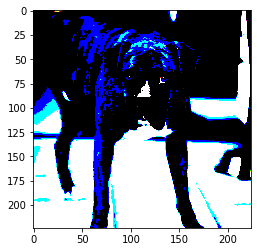

In [68]:
# test training generator
for _ in train_generator(tr_files, tr_labels):
    print(_[0].shape, _[1].shape)
    plt.imshow(np.clip(_[0][0] / 2. + 0.5, 0, 1))
    break

Объявляем нашу модель. Задаём начальные веса, количество классов.

In [69]:
def vgg(use_imagenet=True):
    # load pre-trained model graph, don't add final layer
    model = keras.applications.VGG16(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                          weights='imagenet' if use_imagenet else None)
    # add new dense layer for our labels
    new_output = keras.layers.Dense(N_CLASSES, activation='softmax')(model.output)
    model = keras.engine.training.Model(model.inputs, new_output)
    return model

In [70]:
model_vgg = vgg()

In [71]:
model_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Мы не хотим обучать всю сеть, это слишком сложно и у нас мало данных. Вместо этого мы будем использовать уже обученные веса. Для наших целей мы только поменяем последние fully-connected слои, обучив их не на 1000 классов, а на 37.

Блокируем все слои кроме последних, чтобы веса в них не менялись при backpropagation

In [72]:
# fix deep layers (fine-tuning only last 50)
for layer in model_vgg.layers:
    layer.trainable = True
for layer in model_vgg.layers[:-4]:
    # fix all but batch norm layers, because we neeed to update moving averages for a new dataset!
    layer.trainable = False
    
for layer in model_vgg.layers:
        print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f15f14749e8> False
<keras.layers.convolutional.Conv2D object at 0x7f16c4077eb8> False
<keras.layers.convolutional.Conv2D object at 0x7f1337d90048> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1337fdd828> False
<keras.layers.convolutional.Conv2D object at 0x7f1337fdd080> False
<keras.layers.convolutional.Conv2D object at 0x7f1337c5f128> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1337b48588> False
<keras.layers.convolutional.Conv2D object at 0x7f1337b48be0> False
<keras.layers.convolutional.Conv2D object at 0x7f1337a571d0> False
<keras.layers.convolutional.Conv2D object at 0x7f1337a76160> False
<keras.layers.pooling.MaxPooling2D object at 0x7f13379212e8> False
<keras.layers.convolutional.Conv2D object at 0x7f1337921940> False
<keras.layers.convolutional.Conv2D object at 0x7f15f064f828> False
<keras.layers.convolutional.Conv2D object at 0x7f15f0676198> False
<keras.layers.pooling.MaxPooling2D object at 0x7f15f08060f0>

In [73]:
# compile new model
model_vgg.compile(
    loss='categorical_crossentropy',  # we train 102-way classification
    optimizer=keras.optimizers.adamax(lr=1e-2),  # we can take big lr here because we fixed first layers
    metrics=['accuracy']  # report accuracy during training
)

In [74]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3054446183583942284
]


In [75]:
# !! Может занять несколько часов вычислительного времени!
# fine tune for 2 epochs (full passes through all training data)
# we make 2*8 epochs, where epoch is 1/8 of our training data to see progress more often
model_vgg.fit_generator(
    train_generator(tr_files, tr_labels), 
    steps_per_epoch=len(tr_files) // BATCH_SIZE // 8,
    epochs=2 * 8,
    validation_data=train_generator(te_files, te_labels), 
    validation_steps=len(te_files) // BATCH_SIZE // 4,
    verbose=1,
    initial_epoch=0
)

Epoch 1/16
22/22 [==============================] - 237s 11s/step - loss: 3.6114 - acc: 0.0213 - val_loss: 3.6155 - val_acc: 0.0227
Epoch 2/16
22/22 [==============================] - 229s 10s/step - loss: 3.6171 - acc: 0.0241 - val_loss: 3.6147 - val_acc: 0.0284
Epoch 3/16
22/22 [==============================] - 229s 10s/step - loss: 3.6170 - acc: 0.0241 - val_loss: 3.6078 - val_acc: 0.0312
Epoch 4/16
22/22 [==============================] - 226s 10s/step - loss: 3.6166 - acc: 0.0185 - val_loss: 3.6154 - val_acc: 0.0256
Epoch 5/16
22/22 [==============================] - 220s 10s/step - loss: 3.6158 - acc: 0.0170 - val_loss: 3.6136 - val_acc: 0.0178
Epoch 6/16
22/22 [==============================] - 223s 10s/step - loss: 3.6140 - acc: 0.0341 - val_loss: 3.6135 - val_acc: 0.0256
Epoch 7/16
22/22 [==============================] - 222s 10s/step - loss: 3.6174 - acc: 0.0227 - val_loss: 3.6081 - val_acc: 0.0369
Epoch 8/16
22/22 [==============================] - 222s 10s/step - loss: 3.

Где то в решение закралась ошибка, судя по val_acc сеть не обучилась.

Да и само решение сделать весь fully-connected слой в VGG обучаемым весьма сомнительное. Мы видим что всего у сети 138 млн параметров, но в fully-connected слое их 100млн! Мы не сильно упрощаем себе задачу таким решением. 

In [76]:
def inception(use_imagenet=True):
    # load pre-trained model graph, don't add final layer
    model = keras.applications.InceptionV3(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                          weights='imagenet' if use_imagenet else None)
    # add global pooling just like in InceptionV3
    new_output = keras.layers.GlobalAveragePooling2D()(model.output)
    # add new dense layer for our labels
    new_output = keras.layers.Dense(N_CLASSES, activation='softmax')(new_output)
    model = keras.engine.training.Model(model.inputs, new_output)
    return model

In [77]:
inception_model = inception()

In [79]:
# how many layers our model has
print(len(inception_model.layers))

313


In [80]:
# set all layers trainable by default
for layer in inception_model.layers:
    layer.trainable = True
    if isinstance(layer, keras.layers.BatchNormalization):
        # we do aggressive exponential smoothing of batch norm
        # parameters to faster adjust to our new dataset
        layer.momentum = 0.9
    
# fix deep layers (fine-tuning only last 50)
for layer in inception_model.layers[:-50]:
    # fix all but batch norm layers, because we neeed to update moving averages for a new dataset!
    if not isinstance(layer, keras.layers.BatchNormalization):
        layer.trainable = False

In [81]:
# compile new model
inception_model.compile(
    loss='categorical_crossentropy',  # we train 102-way classification
    optimizer=keras.optimizers.adamax(lr=1e-2),  # we can take big lr here because we fixed first layers
    metrics=['accuracy']  # report accuracy during training
)

In [85]:
# !! Может занять несколько часов вычислительного времени!
# fine tune for 2 epochs (full passes through all training data)
# we make 2*8 epochs, where epoch is 1/8 of our training data to see progress more often
inception_model.fit_generator(
    train_generator(tr_files, tr_labels, inception=True), 
    steps_per_epoch=len(tr_files) // BATCH_SIZE // 8,
    epochs=2 * 8,
    validation_data=train_generator(te_files, te_labels, inception=True), 
    validation_steps=len(te_files) // BATCH_SIZE // 4,
    verbose=1,
    initial_epoch=0
)

Epoch 1/16
22/22 [==============================] - 259s 12s/step - loss: 3.5790 - acc: 0.3352 - val_loss: 5.6983 - val_acc: 0.3409
Epoch 2/16
22/22 [==============================] - 253s 12s/step - loss: 1.5214 - acc: 0.6037 - val_loss: 1.2970 - val_acc: 0.6989
Epoch 3/16
22/22 [==============================] - 300s 14s/step - loss: 0.9768 - acc: 0.6946 - val_loss: 0.8979 - val_acc: 0.7386
Epoch 4/16
22/22 [==============================] - 307s 14s/step - loss: 0.8032 - acc: 0.7401 - val_loss: 0.5676 - val_acc: 0.8097
Epoch 5/16
22/22 [==============================] - 534s 24s/step - loss: 0.6970 - acc: 0.7912 - val_loss: 0.4601 - val_acc: 0.8669
Epoch 6/16
22/22 [==============================] - 666s 30s/step - loss: 0.6461 - acc: 0.8011 - val_loss: 0.4967 - val_acc: 0.8409
Epoch 7/16
22/22 [==============================] - 395s 18s/step - loss: 0.6213 - acc: 0.7969 - val_loss: 0.5212 - val_acc: 0.8352
Epoch 8/16
22/22 [==============================] - 641s 29s/step - loss: 0.

Мы оставили возможность дообучения только для последних 50-ти слоёв, в которых находится около 5 млн параметров. Уже гораздо лучше, чем в предыдущем случае.

Модель дообучилась успешно. Небольшое переобучение присутствует. Мы видим, что где то с 8й эпохи точность на валидационном сете не растёт, хотя на тренировочном продолжает улучшаться. Значит наша модель слишком приспосабливается к обучающей выборке.

Теперь даже с маленьким количеством данных мы можем обучить сеть распознавать классы на мировом уровне.

А самые современные свёрточные сети имеют сверх-сложную архитектуру и миллионы параметров. Например InceptionV3. Многие типы слоём мы даже не рассматривали, это отличная возможность попробовать разобраться в теме самостоятельно.

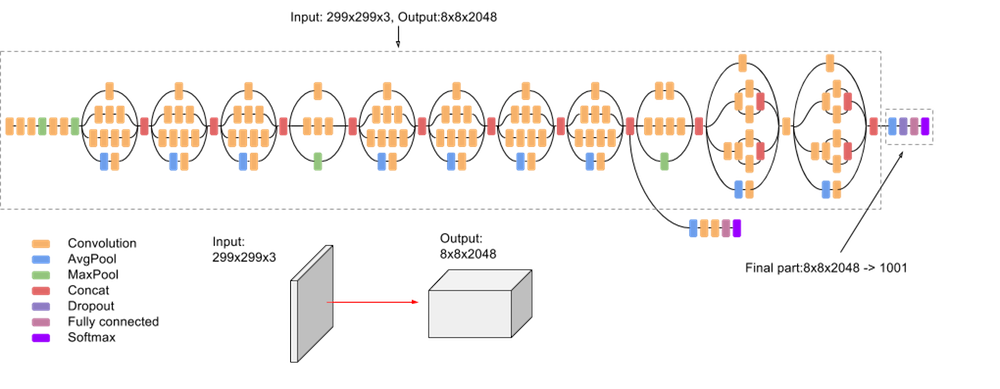

In [236]:
Image(filename='img/l6_25.png')

In [46]:
inception = keras.applications.InceptionV3()
inception.summary()

96116736/96112376 [==============================] - 20s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation_3 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
___________________________________________